In [44]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
ds = load_diabetes()

In [ ]:
print(ds.DESCR)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(ds.data, ds.target, train_size=0.5)

In [52]:
dtr = DecisionTreeRegressor()

In [74]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [75]:
mean_squared_error(y_train, dtr.predict(X_train))

0.0

In [76]:
mean_squared_error(y_test, dtr.predict(X_test))

6368.6742081447965

In [112]:
res = np.zeros(X_test.shape[0])

In [113]:
N = 100

Рандом деревьев с ~60% известных им данных

In [114]:
for i in range(N):
    index = np.random.choice(np.arange(X_train.shape[0]), size = X_train.shape[0], replace = True)
    dtr.fit(X_train[index], y_train[index])
    res += dtr.predict(X_test)

In [115]:
mean_squared_error(y_test, res/N) #res / 100 (суммируем все ответы и делим на количество деревьев жеж)

3094.640518764706

Рандомить еще и признаки - не лучшая идея

In [106]:
res = np.zeros(X_test.shape[0])
for i in range(N):
    index = np.random.choice(np.arange(X_train.shape[0]), size = X_train.shape[0], replace = True) #рандомим строчку
    index_feature = np.random.choice(np.arange(X_train.shape[1]), size = round(X_train.shape[1]*0.2)) #рандомим и признак (зря)Ы
    dtr.fit(X_train[index][:, index_feature], y_train[index])
    res += dtr.predict(X_test[:, index_feature])

In [107]:
mean_squared_error(y_test, res/N)

4089.3448187200825

Случайный лес с рандомом признаков на делении в процессе

In [116]:
rfr = RandomForestRegressor(n_estimators=100, max_features=0.2)

In [117]:
rfr.fit(X_train, y_train)

RandomForestRegressor(max_features=0.2, n_estimators=5000)

In [118]:
mean_squared_error(y_test, rfr.predict(X_test))

2960.8842398200904

In [29]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, rfr.predict(X_test))

0.34095984808403595

Визуализация выбора количества деревьев и доступных признаков в качестве гиперпараметров

In [45]:
Q = []

In [46]:
for n_est in range(1,200, 2):
    rfr1 = RandomForestRegressor(n_estimators= n_est, max_features=0.2)
    rfr1.fit(X_train, y_train)
    Q.append(mean_squared_error(y_test, rfr1.predict(X_test)))

Text(0, 0.5, 'MSE')

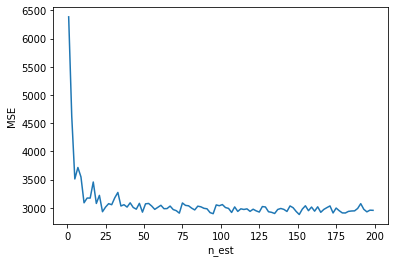

In [48]:
plt.plot(range(1, 200, 2), Q)
plt.xlabel('n_est')
plt.ylabel('MSE')

In [285]:
Q1 = []

In [278]:
# cyka = []
# import random
# for x in range(50):
#     x = random.uniform(0, 1)
#     cyka.append(x)
# cyka.sort()

In [286]:
for m_f in range(1, 11):
    rfr2 = RandomForestRegressor(n_estimators=100, max_features= m_f)
    rfr2.fit(X_train, y_train)
    Q1.append(mean_squared_error(y_test, rfr2.predict(X_test)))

Text(0, 0.5, 'MSE')

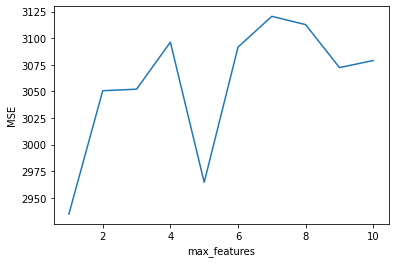

In [287]:
plt.plot(range(1, 11), Q1)
plt.xlabel('max_features')
plt.ylabel('MSE')

In [288]:
Q1[np.argmin(Q1)] #порядковый номер

2934.805644343892

Важность признаков

In [198]:
rfr3 = RandomForestRegressor(n_estimators= 200, max_features= 0.2)
rfr3.fit(X_train, y_train)
mean_squared_error(y_test, rfr3.predict(X_test))

2993.2797544117648

In [199]:
rfr3.feature_importances_

array([0.06833871, 0.01348047, 0.18527193, 0.13653044, 0.06886005,
       0.07099897, 0.08827319, 0.07769014, 0.20080844, 0.08974765])

In [201]:
import seaborn as sns
import pandas as pd

In [204]:
features_imp = pd.DataFrame({'importance': rfr3.feature_importances_,
'name':ds.feature_names})

<AxesSubplot:xlabel='importance', ylabel='name'>

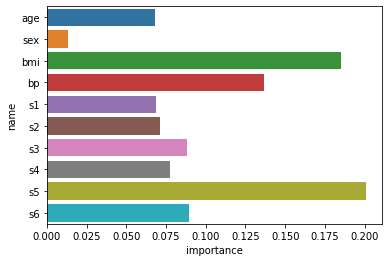

In [293]:
sns.barplot(x='importance', y='name', data=features_imp)

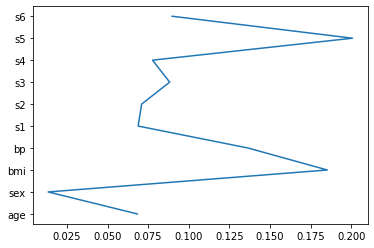

In [296]:
plt.plot(rfr3.feature_importances_, ds.feature_names)

Тут должен был быть код с примерами выбрасывания столца важного и не важного и зависимости МСЕ от этого (заметно хуже при важном, чуть хуже при неважном)

_________________________________________________________

Прикрутим Линейку к Лесу

In [297]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [300]:
lr.fit(X_train, y_train)

LinearRegression()

In [301]:
mean_squared_error(y_test, lr.predict(X_test))

2665.473021390654

In [302]:
rfr4 = RandomForestRegressor()
rfr4.fit(X_train, y_train)

RandomForestRegressor()

In [312]:
min_mse = mean_squared_error(y_test, lr.predict(X_test))
for i in range(100):
    mse = mean_squared_error(y_test, (i * lr.predict(X_test) +\
         (100 - i) * rfr4.predict(X_test))/100.0) # палочка для переноса

    if mse < min_mse:
        min_mse = mse
        best_i = i

In [313]:
best_i

80

In [317]:
mean_squared_error(y_test, (best_i*lr.predict(X_test)+ \
    (100-best_i)*rfr4.predict(X_test))/100.0)

2635.1507604074245